# 1 Processing the videos

**Objective:** Use openCV to read videos frame by frame. Use matplotlib or openCV to save the frames as images. Use openCV to compare frames from genuine and Deepfake videos. You can compute a simple difference between original and Deepfake frames and save the difference as an image. You can also compare the histograms of original and Deepfake frames.

Workflow: 

1. Use Python Glob library to recursively iterate through both real and fake videos folders.
2. Use a popular openCV library for image and video processing and analysis to loop through the frames of each video.
3. Save frames a JPEG images for one original (your choice) and the corresponding Deepfake video to the disk. You can use  matplotlib or openCV  for that.
4. Take one frame from an original video and the same frame from the corresponding Deepfake. Find difference between these two frames and save it as an image to visually see the difference. 
5. Compute histograms for these two frames (one from original video and the corresponding one from Deepfake) and visualize them with matplotlib. How does the difference look like? 
6. Observe what makes video frames from Deepfake videos look different compared to originals.

### Step 1.1: Loop through videos and create file lists

We assume that the required video data is downloaded and stored in the following folders (but the path can be changed accordingly):
* `./VidTIMIT` - folder with original videos
* `./DeepfakeTIMIT`- folder with Deepfake videos

Using `glob` we can loop through the video files in our real and fake folders and create a list of real and fake video files. We sort these lists, so that first few videos of real and fake correspond to each other. 


In [1]:
# the paths to the actual data can be changed here
real_folder = './VidTIMIT/VidTIMIT/'
fake_folder = './DeepfakeTIMIT/higher_quality/'  # we focus on high quality videos of DeepfakeTIMIT dataset

In [2]:
import numpy as np
import glob
import os
import cv2

#os.getcwd()

In [3]:
# Get the list of all files and directories
# in real_folder working directory
dir_list = os.listdir(real_folder)
dir_list

['fadg0',
 'faks0',
 'fcft0',
 'fcmh0',
 'fcmr0',
 'fcrh0',
 'fdac1',
 'fdms0',
 'fdrd1',
 'fedw0',
 'felc0',
 'fgjd0',
 'fjas0',
 'fjem0',
 'fjre0',
 'fjwb0',
 'fkms0',
 'fpkt0',
 'fram1',
 'mabw0',
 'mbdg0',
 'mbjk0',
 'mccs0',
 'mcem0',
 'mdab0',
 'mdbb0',
 'mdld0',
 'mgwt0',
 'mjar0',
 'mjsw0',
 'mmdb1',
 'mmdm2',
 'mpdf0',
 'mpgl0',
 'mrcz0',
 'mreb0',
 'mrgg0',
 'mrjo0',
 'msjs1',
 'mstk0',
 'mtas1',
 'mtmr0',
 'mwbt0']

In [4]:
len(dir_list)

43

In [5]:
# Get the list of all files and directories
# in fake_folder working directory
dir_list = os.listdir(fake_folder)
dir_list

['.dircksum',
 'fadg0',
 'faks0',
 'fcft0',
 'fcmh0',
 'fdac1',
 'fdrd1',
 'fedw0',
 'felc0',
 'fjas0',
 'fjem0',
 'fjre0',
 'fjwb0',
 'fkms0',
 'fram1',
 'mccs0',
 'mcem0',
 'mdab0',
 'mdbb0',
 'mdld0',
 'mgwt0',
 'mjar0',
 'mjsw0',
 'mmdb1',
 'mmdm2',
 'mpdf0',
 'mpgl0',
 'mrcz0',
 'mrgg0',
 'mrjo0',
 'msjs1',
 'mstk0',
 'mwbt0']

In [6]:
len(dir_list)

33

In [7]:
# some settings to make it smoothly runnable in Jupyter
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline
import matplotlib.pyplot as plt


# iterate through real and fake videos
# creates lists of real and fake videos
real_videos_list = []
fake_videos_list = []

for f in glob.glob(os.path.join(real_folder, "*/*.avi")):
    real_videos_list.append(f)
for f in glob.glob(os.path.join(fake_folder, "*/*.avi")):
    fake_videos_list.append(f)
    

In [8]:
len(real_videos_list)

430

In [9]:
real_videos_list

['./VidTIMIT/VidTIMIT\\fadg0\\sa1.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sa2.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si1279.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si1909.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si649.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx109.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx19.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx199.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx289.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx379.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sa1.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sa2.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si1573.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si2203.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si943.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sx133.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sx223.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sx313.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sx403.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sx43.avi',
 './VidTIMIT/VidTIMIT\\fcft0\\sa1.avi',
 './VidTIMIT/VidTIMIT\\fcft0\\sa2.avi',
 './VidTIMIT/VidTIMIT\\fcft0\\si1178.avi',
 './VidTIMIT/VidTIMIT\\fcft0\\si1808.avi',


In [10]:
len(fake_videos_list)

320

In [11]:
fake_videos_list

['./DeepfakeTIMIT/higher_quality\\fadg0\\sa1-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\sa2-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\si1279-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\si1909-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\si649-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\sx109-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\sx19-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\sx199-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\sx289-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\fadg0\\sx379-video-fram1.avi',
 './DeepfakeTIMIT/higher_quality\\faks0\\sa1-video-fedw0.avi',
 './DeepfakeTIMIT/higher_quality\\faks0\\sa2-video-fedw0.avi',
 './DeepfakeTIMIT/higher_quality\\faks0\\si1573-video-fedw0.avi',
 './DeepfakeTIMIT/higher_quality\\faks0\\si2203-video-fedw0.avi',
 './DeepfakeTIMIT/higher_quality\\faks0\\si943-video-fedw0.avi',
 './DeepfakeTIMIT/higher_quali

In [12]:
# sort the videos:
real_videos_list = sorted(real_videos_list)
fake_videos_list = sorted(fake_videos_list)

In [13]:
real_videos_list[0:15]

['./VidTIMIT/VidTIMIT\\fadg0\\sa1.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sa2.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si1279.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si1909.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si649.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx109.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx19.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx199.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx289.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx379.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sa1.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sa2.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si1573.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si2203.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si943.avi']

In [14]:
real_videos_list[0:15]

['./VidTIMIT/VidTIMIT\\fadg0\\sa1.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sa2.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si1279.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si1909.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\si649.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx109.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx19.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx199.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx289.avi',
 './VidTIMIT/VidTIMIT\\fadg0\\sx379.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sa1.avi',
 './VidTIMIT/VidTIMIT\\faks0\\sa2.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si1573.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si2203.avi',
 './VidTIMIT/VidTIMIT\\faks0\\si943.avi']

### Step 1.2: save frames of one video to the disk

Pick and example real and fake video (we just take first from the corresponding lists) and save their frames to the disk and JPEG images using `openCV`.

In [15]:
video_id = 30

In [16]:
# let's take one real video and one fake
real_video = real_videos_list[video_id]
fake_video = fake_videos_list[video_id]

# write a function that loops through frames and save them to the disk
def save_video_frames(video_path):
    image_name = os.path.splitext(video_path)[0]
    
    cap = cv2.VideoCapture(video_path)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for frame_no in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        cv2.imwrite(image_name + '_' + str(frame_no) + '.jpg', frame)

# save frames of real video
save_video_frames(real_video)
save_video_frames(fake_video)


### Step 1.3: Compare real and fake frames

Take an example pair of real and fake frames we have saved and use `matplotlib` to display the images and their pixel-wise difference side-by-side.


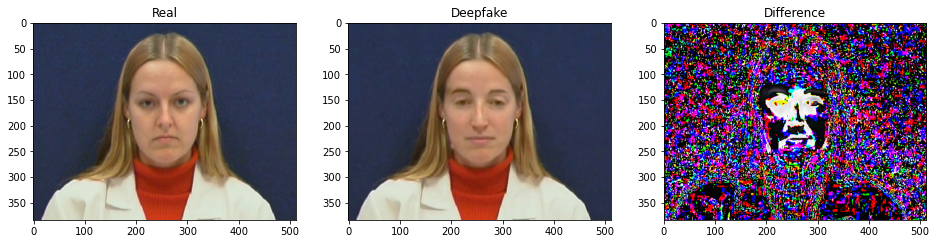

In [17]:
# take one frame from real video and the same one from fake
real_frame_name = os.path.splitext(real_video)[0] + '_1.jpg'
fake_frame_name = os.path.splitext(fake_video)[0] + '_1.jpg'

# define a function that will read and display given images and their difference
def read_display_images(real_image_name, fake_image_name):
    real_image = cv2.imread(real_image_name)
    fake_image = cv2.imread(fake_image_name)

    # note that images in OpenCV are in BGR format, 
    # and to plot with matplotlib, we convert them to RGB
    real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)
    fake_image = cv2.cvtColor(fake_image, cv2.COLOR_BGR2RGB)

    # find the difference between the images
    image_diff = None
    if real_image.shape == fake_image.shape:
        image_diff = real_image - fake_image

    # show the images side by side
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(real_image)
    plt.title('Real')
    plt.subplot(1, 3, 2)
    plt.title('Deepfake')
    plt.imshow(fake_image)
    if image_diff is not None:
        plt.subplot(1, 3, 3)
        plt.title('Difference')
        plt.imshow(image_diff)
    plt.show()
    return real_image, fake_image, image_diff

real_image, fake_image, image_diff = read_display_images(real_frame_name, fake_frame_name)

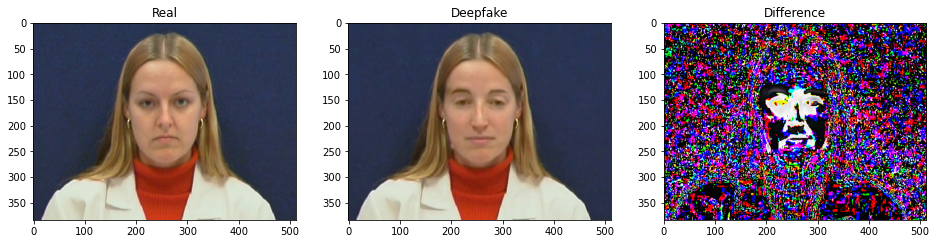

In [18]:
# take one frame from real video and the same one from fake
real_frame_name = os.path.splitext(real_video)[0] + '_1.jpg'
fake_frame_name = os.path.splitext(fake_video)[0] + '_1.jpg'

# define a function that will read and display given images and their difference
def read_display_images(real_image_name, fake_image_name):
    real_image = cv2.imread(real_image_name)
    fake_image = cv2.imread(fake_image_name)

    # note that images in OpenCV are in BGR format, 
    # and to plot with matplotlib, we convert them to RGB
    real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)
    fake_image = cv2.cvtColor(fake_image, cv2.COLOR_BGR2RGB)

    # find the difference between the images
    image_diff = None
    if real_image.shape == fake_image.shape:
        image_diff = real_image - fake_image

    # show the images side by side
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(real_image)
    
    plt.title('Real')
    plt.subplot(1, 3, 2)
    plt.title('Deepfake')
    plt.imshow(fake_image)
    
    if image_diff is not None:
        plt.subplot(1, 3, 3)
        plt.title('Difference')
        plt.imshow(image_diff)
    
    # plt.subplot(2, 3, 4)
    # hist,bins = np.histogram(real_image.flatten(),256,[0,256])
    # plt.hist(real_image.flatten(),256,[0,256], color = 'r')
    # plt.xlim([0,256])
    # plt.imshow() 

    # plt.subplot(2, 3, 5)
    # hist,bins = np.histogram(fake_image.flatten(),256,[0,256])
    # plt.hist(fake_image.flatten(),256,[0,256], color = 'r')
    # plt.xlim([0,256])
    # plt.imshow() 
    
    # plt.subplot(2, 3, 6)
    # hist,bins = np.histogram(image_diff.flatten(),256,[0,256])
    # plt.hist(image_diff.flatten(),256,[0,256], color = 'r')
    # plt.xlim([0,256])
    # plt.imshow()
        
    return real_image, fake_image, image_diff

real_image, fake_image, image_diff = read_display_images(real_frame_name, fake_frame_name)

In [19]:
# histograms

real_frame_name = os.path.splitext(real_video)[0] + '_1.jpg'
real_image = cv2.imread(real_frame_name)
real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)

fake_frame_name = os.path.splitext(fake_video)[0] + '_1.jpg'
fake_image = cv2.imread(fake_frame_name)
fake_image = cv2.cvtColor(fake_image, cv2.COLOR_BGR2RGB)

# find the difference between the images
image_diff = None
if real_image.shape == fake_image.shape:
    image_diff = real_image - fake_image

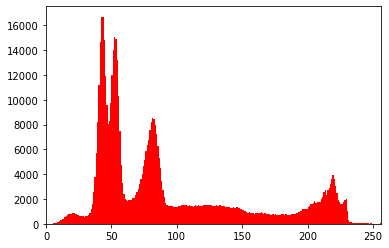

In [20]:
hist,bins = np.histogram(real_image.flatten(),256,[0,256])
plt.hist(real_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

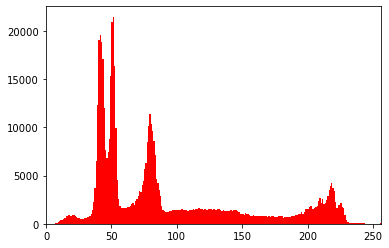

In [21]:
hist,bins = np.histogram(fake_image.flatten(),256,[0,256])
plt.hist(fake_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

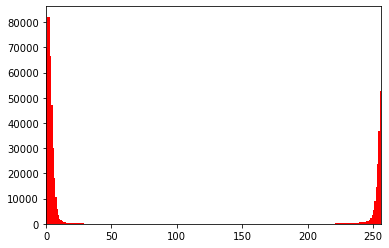

In [22]:
hist,bins = np.histogram(image_diff.flatten(),256,[0,256])
plt.hist(image_diff.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [23]:
print("end")

end
